Insights and Observations 

~ The deaths of Chester Bennington (Linkin Park) and Tom Petty had the most significant initial effect of on Spotify streams by a wide margin. Linkin Park and Tom Petty accumulated 10,647,809 and 9,080,227 streams, respectively, in the day following their deaths and were responible for 14% and 11.5% of total songs on the chart those days. However, Linkin Park had a much more prolonged increase in streams, maintaining at least one song on the streaming chart for three weeks, while Tom Petty's final appearance came one week after his death.   

~ Overall, the data supports our hypothesis that the number of Spotify streams would dramatically increase following an artist's death. It was interesting, however to observe the variance in how long deceased artists maintained a position within the top 200 daily charts. 

~ Spotify only lists the number of streams for songs in the top 200, thus the total number of songs reflect only those particular tracks. It would be advantageous to be able to gather data from the entirety of an artists streams, which would also provide an even more telling look at their pre-death numbers and exactly how long after their deaths an increase was observed.   

~ Two artist provided unanticipated data that raised an additional question to contemplate: What are some song trends during certain seasons or particular events. Chuck Berry had just one song on one day reach the chart following his death, however, he appeared 33 times in the holiday season with his song "Run Rudolph Run." Following the death of guitarist Malcolm Young, there were no appearances for AC/DC, but they made the charts on New Years Day with "You Shook Me All Night Long," and on Halloween with "Hightway to Hell."    


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Not every CSV requires an encoding, but be aware this can come up
US_Daily_2017_df = pd.read_csv("Resources/2017-daily-us-charts.csv")


In [3]:
# Show just the header
US_Daily_2017_df.head()

,Date,Position,Track Name,Artist,Streams,ID
0,1/1/2017,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,4Km5HrUvYTaSUfiSGPJeQR
1,1/1/2017,2,Fake Love,Drake,1180074,343YBumqHu19cGoGARUTsd
2,1/1/2017,3,Starboy,The Weeknd,1064351,5aAx2yezTd8zXrkmtKl66Z
3,1/1/2017,4,Closer,The Chainsmokers,1010492,7BKLCZ1jbUBVqRi2FVlTVw
4,1/1/2017,5,Black Beatles,Rae Sremmurd,874289,6fujklziTHa8uoM5OQSfIo


In [4]:
#Import Wikipedia csv file
Deaths_df = pd.read_csv("Resources/2017 Musician Deaths (Wiki).csv")
Deaths_df

,Artist,Name,Age,Death
0,Manic Hispanic,Mike Gaborno,51,1/4/2017
1,Fanny Adams,Johnny Dick,73,1/6/2017
2,The Contours,Sylvester Potts,78,1/6/2017
3,Sons of Hawaii,Eddie Kamae,89,1/7/2017
4,Czerwone Gitary,Jerzy Kossela,74,1/7/2017
...,...,...,...,...
163,Sanctuary,Warrel Dane,56,12/13/2017
164,Michael Prophet,Michael Prophet,60,12/16/2017
165,Richard Dobson,Richard Dobson,75,12/16/2017
166,Kevin Mahogany,Kevin Mahogany,59,12/17/2017


In [5]:
#Merge the two csv files for formatting 
merged_df = pd.merge(Deaths_df, US_Daily_2017_df, how="left", on=["Artist", "Artist"])
merged_df
                                                                

,Artist,Name,Age,Death,Date,Position,Track Name,Streams,ID
0,Manic Hispanic,Mike Gaborno,51,1/4/2017,NaN,NaN,NaN,NaN,NaN
1,Fanny Adams,Johnny Dick,73,1/6/2017,NaN,NaN,NaN,NaN,NaN
2,The Contours,Sylvester Potts,78,1/6/2017,NaN,NaN,NaN,NaN,NaN
3,Sons of Hawaii,Eddie Kamae,89,1/7/2017,NaN,NaN,NaN,NaN,NaN
4,Czerwone Gitary,Jerzy Kossela,74,1/7/2017,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
437,Sanctuary,Warrel Dane,56,12/13/2017,NaN,NaN,NaN,NaN,NaN
438,Michael Prophet,Michael Prophet,60,12/16/2017,NaN,NaN,NaN,NaN,NaN
439,Richard Dobson,Richard Dobson,75,12/16/2017,NaN,NaN,NaN,NaN,NaN
440,Kevin Mahogany,Kevin Mahogany,59,12/17/2017,NaN,NaN,NaN,NaN,NaN


In [6]:
#Drop rows with inapplicable data
drop_df = merged_df.dropna()
drop_df

,Artist,Name,Age,Death,Date,Position,Track Name,Streams,ID
55,Chuck Berry,Chuck Berry,90,3/18/2017,3/19/2017,174.0,Johnny B. Goode,166987.0,3BUQFs6aFWh7EFNmI8bfL7
56,Chuck Berry,Chuck Berry,90,3/18/2017,11/24/2017,152.0,Run Rudolph Run - Single Version,177622.0,2pnPe4pJtq7689i5ydzvJJ
57,Chuck Berry,Chuck Berry,90,3/18/2017,11/25/2017,137.0,Run Rudolph Run - Single Version,197509.0,2pnPe4pJtq7689i5ydzvJJ
58,Chuck Berry,Chuck Berry,90,3/18/2017,11/26/2017,130.0,Run Rudolph Run - Single Version,213637.0,2pnPe4pJtq7689i5ydzvJJ
59,Chuck Berry,Chuck Berry,90,3/18/2017,11/27/2017,141.0,Run Rudolph Run - Single Version,215543.0,2pnPe4pJtq7689i5ydzvJJ
...,...,...,...,...,...,...,...,...,...
414,Lil Peep,Lil Peep,21,11/17/2017,12/19/2017,163.0,Save That Shit,228223.0,6sn8WaooLLVhQvU96wtEAm
415,Lil Peep,Lil Peep,21,11/17/2017,12/20/2017,145.0,Save That Shit,242199.0,6sn8WaooLLVhQvU96wtEAm
416,Lil Peep,Lil Peep,21,11/17/2017,12/21/2017,164.0,Save That Shit,232566.0,6sn8WaooLLVhQvU96wtEAm
417,AC/DC,Malcolm Young,64,11/18/2017,1/1/2017,135.0,You Shook Me All Night Long,178791.0,2SiXAy7TuUkycRVbbWDEpo


In [7]:
# drop_df.to_csv("Resources/Cleaned Death.csv",encoding="utf-8", index=False, header=True)

In [8]:
#Clean dataframe by dropping unneeded columns
drop_columns_df = drop_df.drop(columns=['Age ','Position','ID'])
drop_columns_df

,Artist,Name,Death,Date,Track Name,Streams
55,Chuck Berry,Chuck Berry,3/18/2017,3/19/2017,Johnny B. Goode,166987.0
56,Chuck Berry,Chuck Berry,3/18/2017,11/24/2017,Run Rudolph Run - Single Version,177622.0
57,Chuck Berry,Chuck Berry,3/18/2017,11/25/2017,Run Rudolph Run - Single Version,197509.0
58,Chuck Berry,Chuck Berry,3/18/2017,11/26/2017,Run Rudolph Run - Single Version,213637.0
59,Chuck Berry,Chuck Berry,3/18/2017,11/27/2017,Run Rudolph Run - Single Version,215543.0
...,...,...,...,...,...,...
414,Lil Peep,Lil Peep,11/17/2017,12/19/2017,Save That Shit,228223.0
415,Lil Peep,Lil Peep,11/17/2017,12/20/2017,Save That Shit,242199.0
416,Lil Peep,Lil Peep,11/17/2017,12/21/2017,Save That Shit,232566.0
417,AC/DC,Malcolm Young,11/18/2017,1/1/2017,You Shook Me All Night Long,178791.0


In [9]:
#Create dataframe by individual artist death
chris_cornell_df = drop_columns_df.loc[drop_columns_df["Name"] == "Chris Cornell",:]
chris_cornell_df.head()

,Artist,Name,Death,Date,Track Name,Streams
114,Soundgarden,Chris Cornell,5/17/2017,5/18/2017,Black Hole Sun,543814.0
115,Soundgarden,Chris Cornell,5/17/2017,5/18/2017,Fell On Black Days,270681.0
116,Soundgarden,Chris Cornell,5/17/2017,5/18/2017,Spoonman,260492.0
117,Soundgarden,Chris Cornell,5/17/2017,5/18/2017,The Day I Tried To Live,217947.0
118,Soundgarden,Chris Cornell,5/17/2017,5/18/2017,Rusty Cage,214917.0


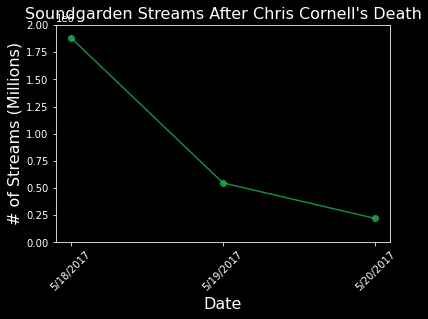

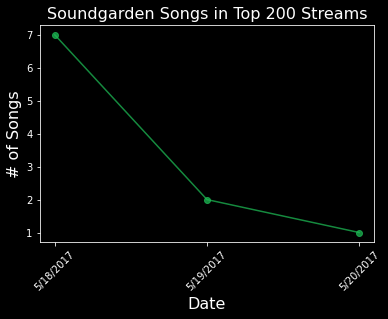

In [19]:
#Line Plot based on number of total streams of songs on Spotify's top 200 plays per artist after their death by day 
soundgarden = chris_cornell_df.groupby("Date")
soundgarden_streams = pd.DataFrame(soundgarden["Streams"].sum())

soundgarden_chart = soundgarden_streams.plot(marker="o", xticks= ([0,1,2]), ylim=(0, 2000000), alpha=0.75, rot=45, legend=False, color="#1DB954")
soundgarden_chart.set_title("Soundgarden Streams After Chris Cornell's Death", fontsize=16)
soundgarden_chart.set_xlabel("Date", fontsize=16)
soundgarden_chart.set_ylabel("# of Streams (Millions)", fontsize=16)

#Line Plot based on number of unique songs streamed in the top 200 songs on Spotify per artist after their death by day
soundgarden = chris_cornell_df.groupby("Date")
soundgarden_streams = pd.DataFrame(soundgarden["Streams"].count())

soundgarden_chart = soundgarden_streams.plot(marker="o", xticks= ([0,1,2]), alpha=0.75, rot=45, legend=False, color="#1DB954")
soundgarden_chart.set_title("Soundgarden Songs in Top 200 Streams", fontsize=16)
soundgarden_chart.set_xlabel("Date", fontsize=16)
soundgarden_chart.set_ylabel("# of Songs", fontsize=16)


plt.style.use('dark_background')

plt.show()


In [11]:
chester_bennington_df = drop_columns_df.loc[drop_columns_df["Name"] == "Chester Bennington",:]
chester_bennington_df.head()

,Artist,Name,Death,Date,Track Name,Streams
143,Linkin Park,Chester Bennington,7/20/2017,2/17/2017,Heavy (feat. Kiiara),320749.0
144,Linkin Park,Chester Bennington,7/20/2017,2/18/2017,Heavy (feat. Kiiara),188088.0
145,Linkin Park,Chester Bennington,7/20/2017,2/20/2017,Heavy (feat. Kiiara),194853.0
146,Linkin Park,Chester Bennington,7/20/2017,2/21/2017,Heavy (feat. Kiiara),184036.0
147,Linkin Park,Chester Bennington,7/20/2017,2/22/2017,Heavy (feat. Kiiara),189565.0


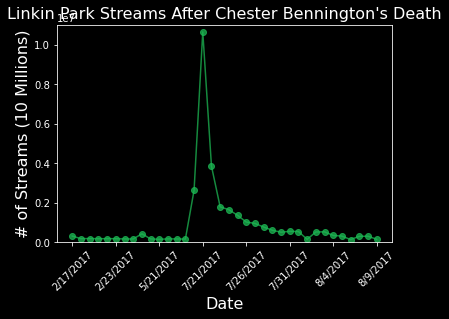

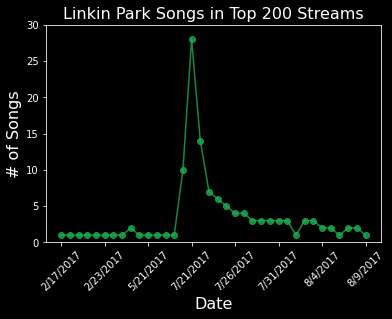

In [12]:
linkinpark = chester_bennington_df.groupby("Date")
linkinpark_streams = pd.DataFrame(linkinpark["Streams"].sum())
linkinparks = chester_bennington_df.groupby("Date")
linkinparks_streams = pd.DataFrame(linkinpark["Streams"].count())

linkinpark_chart = linkinpark_streams.plot(kind='line', marker="o", ylim=(0, 11000000), alpha=0.75, rot=45, legend=False, color="#1DB954")
linkinpark_chart.set_title("Linkin Park Streams After Chester Bennington's Death", fontsize=16)
linkinpark_chart.set_xlabel("Date", fontsize=16)
linkinpark_chart.set_ylabel("# of Streams (10 Millions)", fontsize=16)

linkinparks_chart = linkinparks_streams.plot(kind='line', marker="o", ylim=(0, 30), alpha=0.75, rot=45, legend=False, color="#1DB954")
linkinparks_chart.set_title("Linkin Park Songs in Top 200 Streams", fontsize=16)
linkinparks_chart.set_xlabel("Date", fontsize=16)
linkinparks_chart.set_ylabel("# of Songs", fontsize=16)

plt.style.use('dark_background')
plt.show()

In [13]:
tom_petty_df = drop_columns_df.loc[drop_columns_df["Name"] == "Tom Petty",:]
tom_petty_df.head()

,Artist,Name,Death,Date,Track Name,Streams
292,Tom Petty,Tom Petty,10/2/2017,10/2/2017,Free Fallin\',274788.0
293,Tom Petty,Tom Petty,10/2/2017,10/2/2017,American Girl,243520.0
294,Tom Petty,Tom Petty,10/2/2017,10/2/2017,Runnin\' Down A Dream,225071.0
295,Tom Petty,Tom Petty,10/2/2017,10/2/2017,Mary Jane\'s Last Dance,198384.0
296,Tom Petty,Tom Petty,10/2/2017,10/2/2017,I Won\'t Back Down,192562.0


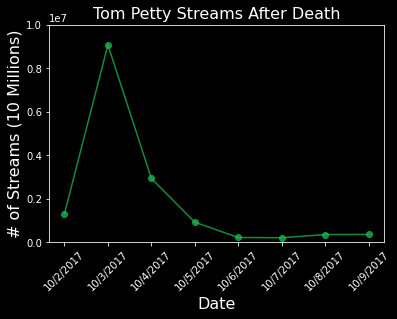

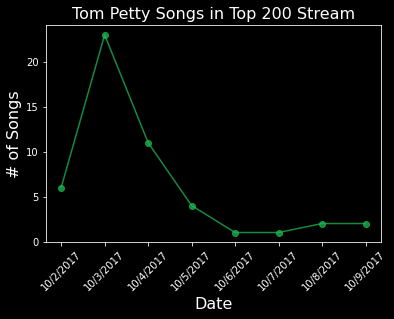

In [14]:
tompetty = tom_petty_df.groupby("Date")
tompetty_streams = pd.DataFrame(tompetty["Streams"].sum())

tompetty_chart = tompetty_streams.plot(kind='line', ylim=(0, 10000000), alpha=0.75, rot=45, marker="o", legend=False, color="#1DB954")
tompetty_chart.set_title("Tom Petty Streams After Death", fontsize=16)
tompetty_chart.set_xlabel("Date", fontsize=16)
tompetty_chart.set_ylabel("# of Streams (10 Millions)", fontsize=16)

tompetty = tom_petty_df.groupby("Date")
tompetty_streams = pd.DataFrame(tompetty["Streams"].count())

tompetty_chart = tompetty_streams.plot(kind='line', alpha=0.75, rot=45, marker="o", legend=False, color="#1DB954")
tompetty_chart.set_title("Tom Petty Songs in Top 200 Stream", fontsize=16)
tompetty_chart.set_xlabel("Date", fontsize=16)
tompetty_chart.set_ylabel("# of Songs", fontsize=16)


plt.style.use('dark_background')
plt.show()

In [15]:
lil_peep_df = drop_columns_df.loc[drop_columns_df["Name"] == "Lil Peep",:]
lil_peep_df.head()

,Artist,Name,Death,Date,Track Name,Streams
358,Lil Peep,Lil Peep,11/17/2017,11/16/2017,Save That Shit,438256.0
359,Lil Peep,Lil Peep,11/17/2017,11/16/2017,Benz Truck - \xd0\xb3\xd0\xb5\xd0\xbb\xd0\xb8\...,334488.0
360,Lil Peep,Lil Peep,11/17/2017,11/16/2017,Awful Things,289695.0
361,Lil Peep,Lil Peep,11/17/2017,11/16/2017,U Said,203186.0
362,Lil Peep,Lil Peep,11/17/2017,11/16/2017,Beamer Boy,191092.0


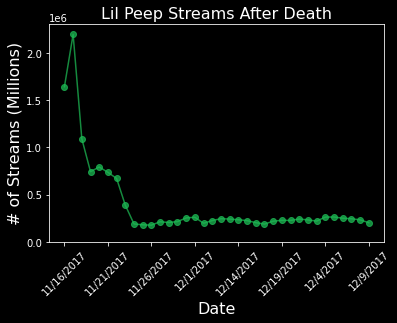

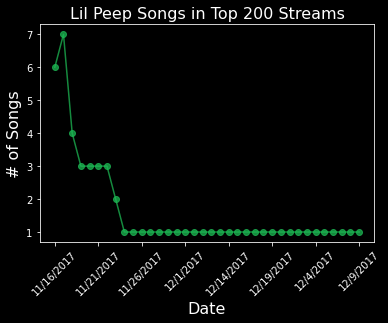

In [16]:
lilpeep = lil_peep_df.groupby("Date")
lilpeep_streams = pd.DataFrame(lilpeep["Streams"].sum())

lilpeep_chart = lilpeep_streams.plot(kind='line', ylim=(0, 2300000), alpha=0.75, rot=45, marker="o", legend=False, color="#1DB954")
lilpeep_chart.set_title("Lil Peep Streams After Death", fontsize=16)
lilpeep_chart.set_xlabel("Date", fontsize=16)
lilpeep_chart.set_ylabel("# of Streams (Millions)", fontsize=16)

lilpeep = lil_peep_df.groupby("Date")
lilpeep_streams = pd.DataFrame(lilpeep["Streams"].count())
lilpeep_streams = lilpeep_streams.sort_index()
lilpeep_chart = lilpeep_streams.plot(kind='line', alpha=0.75, rot=45, marker="o", legend=False, color="#1DB954")
lilpeep_chart.set_title("Lil Peep Songs in Top 200 Streams", fontsize=16)
lilpeep_chart.set_xlabel("Date", fontsize=16)
lilpeep_chart.set_ylabel("# of Songs", fontsize=16)

plt.style.use('dark_background')
plt.show()

In [17]:
chuck_berry_df = drop_columns_df.loc[drop_columns_df["Name"] == "Chuck Berry",:]
chuck_berry_df.head()

,Artist,Name,Death,Date,Track Name,Streams
55,Chuck Berry,Chuck Berry,3/18/2017,3/19/2017,Johnny B. Goode,166987.0
56,Chuck Berry,Chuck Berry,3/18/2017,11/24/2017,Run Rudolph Run - Single Version,177622.0
57,Chuck Berry,Chuck Berry,3/18/2017,11/25/2017,Run Rudolph Run - Single Version,197509.0
58,Chuck Berry,Chuck Berry,3/18/2017,11/26/2017,Run Rudolph Run - Single Version,213637.0
59,Chuck Berry,Chuck Berry,3/18/2017,11/27/2017,Run Rudolph Run - Single Version,215543.0


In [18]:
malcolm_young_df = drop_columns_df.loc[drop_columns_df["Name"] == "Malcolm Young",:]
malcolm_young_df

,Artist,Name,Death,Date,Track Name,Streams
417,AC/DC,Malcolm Young,11/18/2017,1/1/2017,You Shook Me All Night Long,178791.0
418,AC/DC,Malcolm Young,11/18/2017,10/31/2017,Highway to Hell,343613.0
